# Retail Sales Prediction

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.metrics import r2_score

train=pd.read_csv(r"C:\Users\samya\Downloads\archive\Train.csv")
test=pd.read_csv(r"C:\Users\samya\Downloads\archive\Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Checking duplicate rows

In [3]:
train_duplicate=train[train.duplicated()]
train_duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [4]:
test_duplicate=test[test.duplicated()]
test_duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


#### Thus, no duplicates

## Checking for the missing values

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Thus,  there are missing values in the 'Item_Weight' and 'Outlet_Size' columns in both train and test datasets which we are going to fill with mean and mode respectively.

### 'Item_Weight'

In [7]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

In [8]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)

### 'Outlet_Size'

In [9]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [10]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

## Rounding off

In [11]:
train["Item_Weight"]=train["Item_Weight"].round()
test["Item_Weight"]=test["Item_Weight"].round()

train["Item_Visibility"]=train["Item_Visibility"].round(3)
test["Item_Visibility"]=test["Item_Visibility"].round(3)

train["Item_MRP"]=train["Item_MRP"].round()
test["Item_MRP"]=test["Item_MRP"].round()

## Univariate Analysis

### 'Item_Weight'

In [12]:
train["Item_Weight"].describe()

count    8523.000000
mean       12.896867
std         4.243392
min         5.000000
25%         9.000000
50%        13.000000
75%        16.000000
max        21.000000
Name: Item_Weight, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

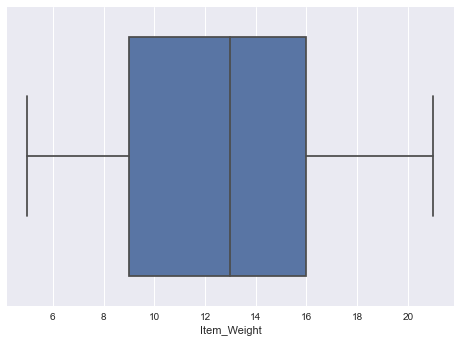

In [13]:
sb.boxplot("Item_Weight",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

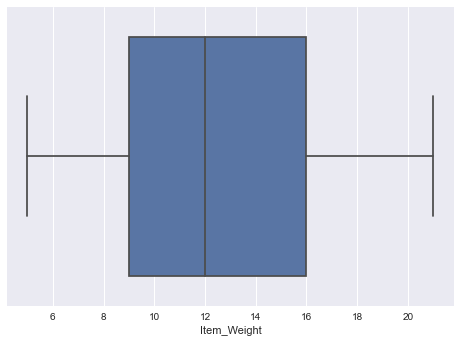

In [14]:
sb.boxplot("Item_Weight",data=test)

#### Thus, no outliers in 'Item_Weight'

### 'Item_Fat_content'

In [15]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [17]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

In [18]:
test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [19]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [20]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

In [21]:
train["Item_Fat_Content"].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

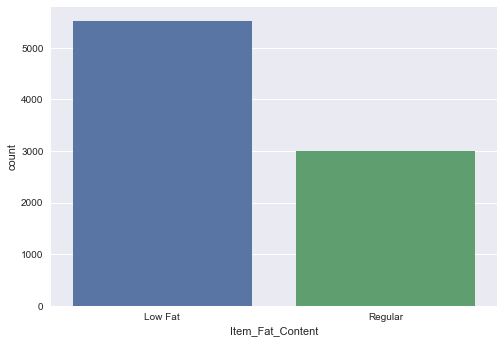

In [22]:
sb.countplot(x="Item_Fat_Content",data=train)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

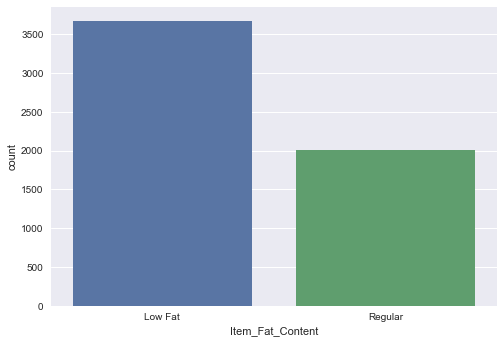

In [23]:
sb.countplot(x="Item_Fat_Content",data=test)

#### All the errors are corrected

### 'Item_Visibility'

In [24]:
train["Item_Visibility"].describe()

count    8523.000000
mean        0.066133
std         0.051588
min         0.000000
25%         0.027000
50%         0.054000
75%         0.095000
max         0.328000
Name: Item_Visibility, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

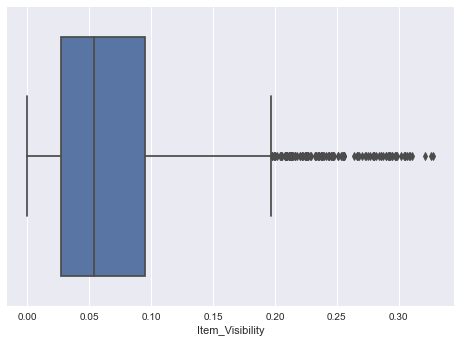

In [25]:
sb.boxplot("Item_Visibility",data=train)

In [26]:
train["Item_Visibility"].loc[train["Item_Visibility"]>0.2]=train["Item_Visibility"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

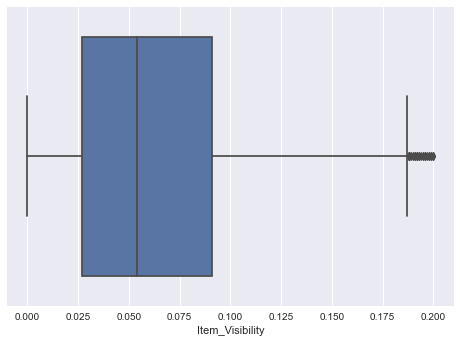

In [27]:
sb.boxplot("Item_Visibility",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

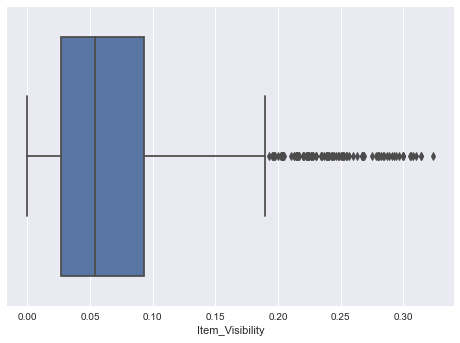

In [28]:
sb.boxplot("Item_Visibility",data=test)

In [29]:
test["Item_Visibility"].loc[test["Item_Visibility"]>0.2]=test["Item_Visibility"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

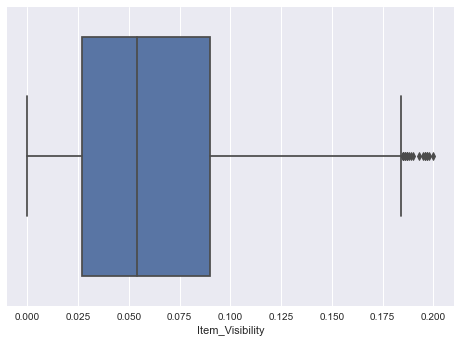

In [30]:
sb.boxplot("Item_Visibility",data=test)

#### Thus, the outliers in 'Item_Visibility' are replaced with the median.

### 'Item_Type'

In [31]:
train["Item_Type"].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

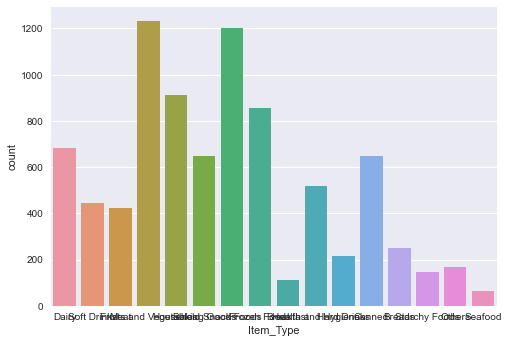

In [32]:
sb.countplot(x="Item_Type",data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

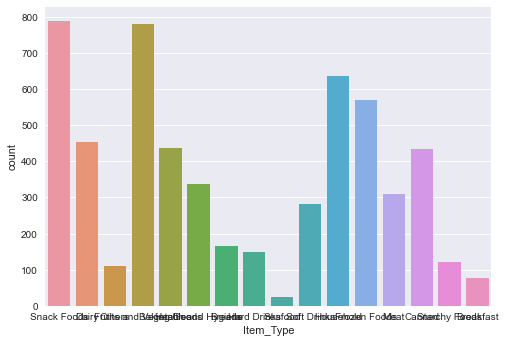

In [33]:
sb.countplot(x="Item_Type",data=test)

#### There are no errors in 'Item_Type'
### 'Item_MRP'

In [34]:
train["Item_MRP"].describe()

count    8523.000000
mean      140.989088
std        62.275770
min        31.000000
25%        94.000000
50%       143.000000
75%       186.000000
max       267.000000
Name: Item_MRP, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

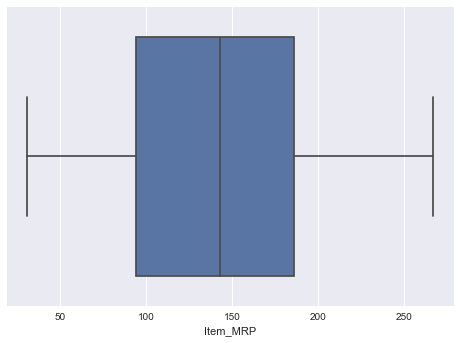

In [35]:
sb.boxplot("Item_MRP",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

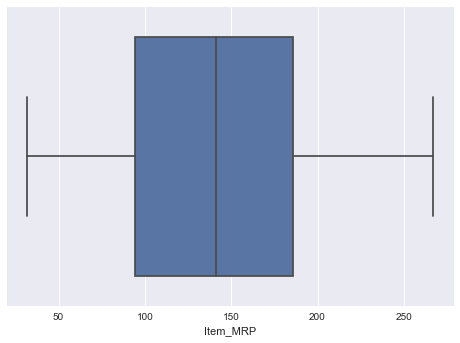

In [36]:
sb.boxplot("Item_MRP",data=test)

#### There are no outliers in 'Item_MRP'
### 'Outlet_Identifier'

In [37]:
train["Outlet_Identifier"].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

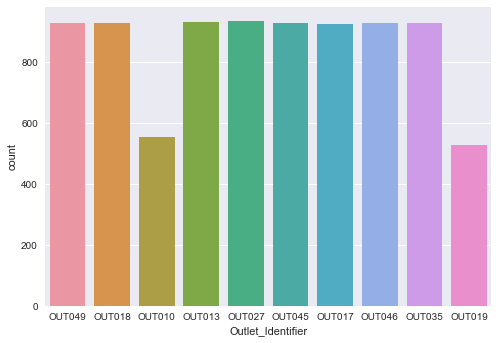

In [38]:
sb.countplot(x="Outlet_Identifier",data=train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

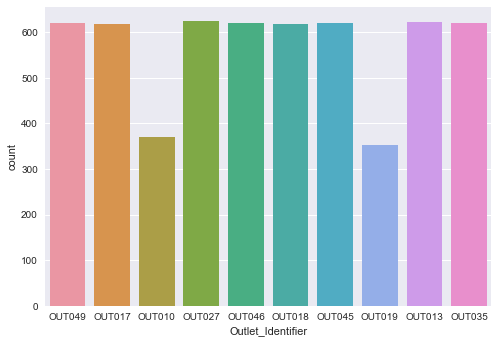

In [39]:
sb.countplot(x="Outlet_Identifier",data=test)

#### There are no errors in 'Outlet_Identifier'
### 'Outlet_Establishment_Year'

In [40]:
train["Outlet_Establishment_Year"].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

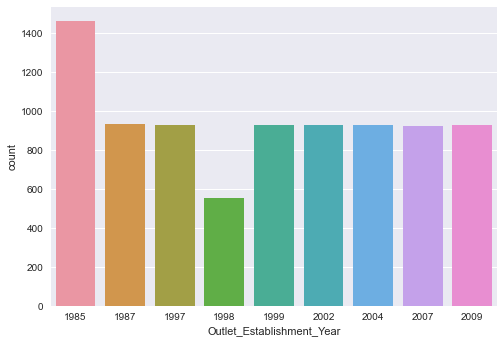

In [41]:
sb.countplot(x="Outlet_Establishment_Year",data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

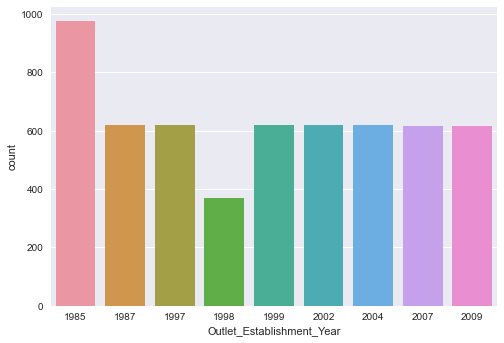

In [42]:
sb.countplot(x="Outlet_Establishment_Year",data=test)

#### As we can see, All the outlets are equal in count but the outlets established in 1985 are higher than the ones in 1998.
### 'Outlet_Size'

In [43]:
train["Outlet_Size"].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

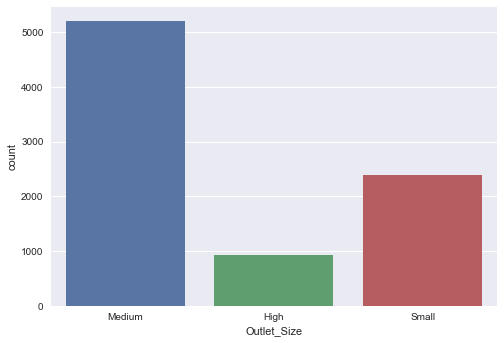

In [44]:
sb.countplot(x="Outlet_Size",data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

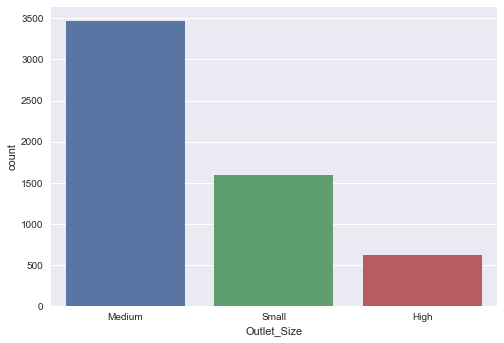

In [45]:
sb.countplot(x="Outlet_Size",data=test)

#### Medium outlets are higher than Small and High.
### 'Outlet_Location_Type'

In [46]:
train["Outlet_Location_Type"].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

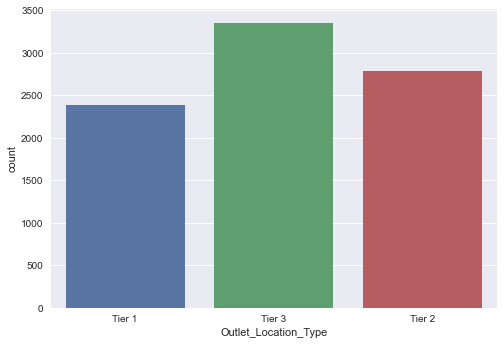

In [47]:
sb.countplot(x="Outlet_Location_Type",data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

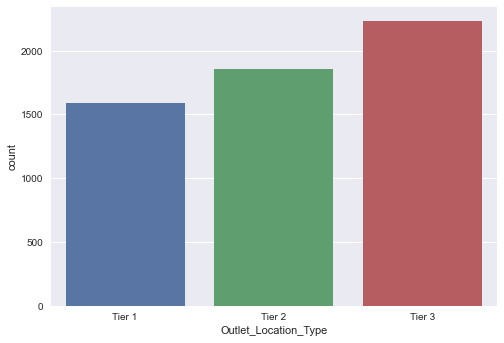

In [48]:
sb.countplot(x="Outlet_Location_Type",data=test)

#### Tier 3 is the highest while Tier 1 is the lowest in count.
### 'Outlet_Type'

In [49]:
train["Outlet_Type"].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

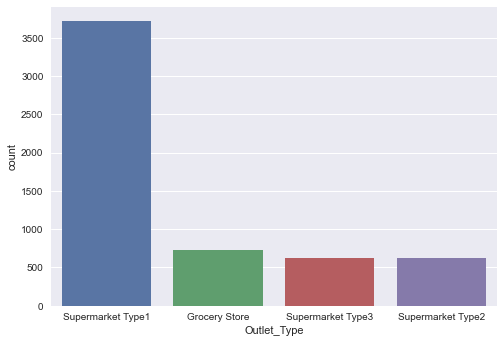

In [50]:
sb.countplot(x="Outlet_Type",data=test)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

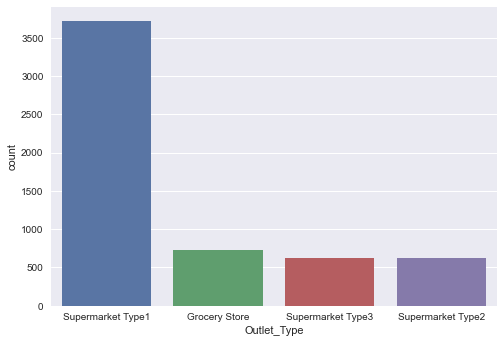

In [51]:
sb.countplot(x="Outlet_Type",data=test)

#### Supermarket Type 1 is very high in count than the other almost equally distributed outlets.

### 'Item_Outlet_Sales'

In [52]:
train["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

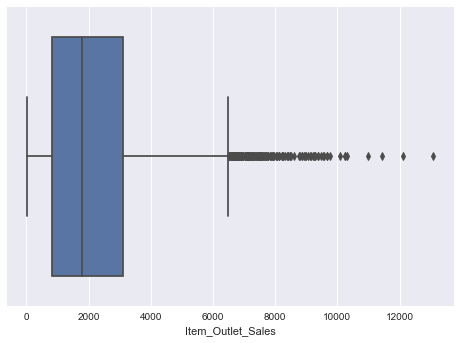

In [53]:
sb.boxplot(x="Item_Outlet_Sales",data=train)

In [54]:
train["Item_Outlet_Sales"].loc[train["Item_Outlet_Sales"]>=10000]=train["Item_Outlet_Sales"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='Item_Outlet_Sales'>

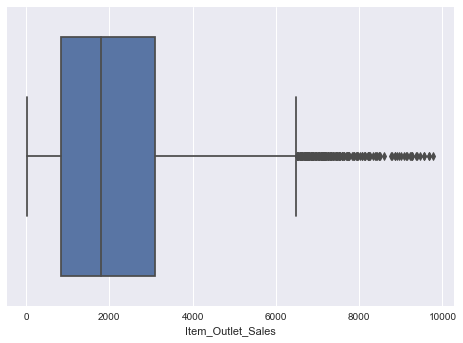

In [55]:
sb.boxplot(x="Item_Outlet_Sales",data=train)

## Bivariate Analysis between the target 'Item_Outlet_Sales' and

### 'Item_Weight'

In [56]:
train.groupby("Item_Weight")["Item_Outlet_Sales"].median()

Item_Weight
5.0     2182.4924
6.0     1639.1996
7.0     1864.2400
8.0     1612.5676
9.0     1589.2646
10.0    1957.4520
11.0    1956.1204
12.0    1669.8264
13.0    1896.1984
14.0    1731.0800
15.0    1856.2504
16.0    1574.6170
17.0    1716.0995
18.0    1977.4260
19.0    1796.9942
20.0    1851.5898
21.0    1749.7224
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

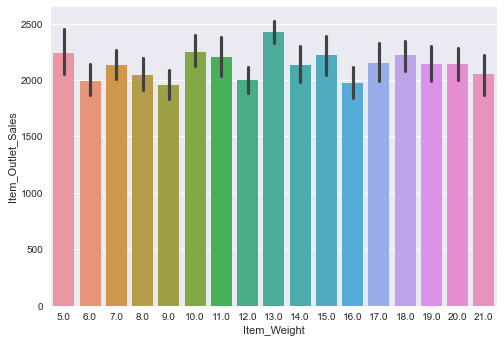

In [57]:
sb.barplot(x="Item_Weight",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b53edbcfd0>,
 [Text(1.1212911977262914, 0.2553547530427793, '5.0'),
  Text(0.9386237674909499, 0.6644436944550646, '6.0'),
  Text(0.6449244828284124, 0.9521409619633561, '7.0'),
  Text(0.2718513960199574, 1.1174062906937658, '8.0'),
  Text(-0.10317968824363367, 1.145361930541585, '9.0'),
  Text(-0.5040586125774017, 1.0336464168595298, '10.0'),
  Text(-0.867933655815221, 0.7544475920189722, '11.0'),
  Text(-1.0827973963651203, 0.38736261877589123, '12.0'),
  Text(-1.1497140026330475, -0.025645899272533624, '13.0'),
  Text(-1.0616913866390918, -0.44194049320735757, '14.0'),
  Text(-0.8315866231552553, -0.7943322278425065, '15.0'),
  Text(-0.5067399076338992, -1.0323345707720863, '16.0'),
  Text(-0.13618744292510196, -1.1419076058900397, '17.0'),
  Text(0.2959058588827501, -1.111278418164801, '18.0'),
  Text(0.6936510443677155, -0.9172503631220748, '19.0'),
  Text(0.9810084289544915, -0.6001020432561788, '20.0'),
  Text(1.1315202378603442, -0.205333755901

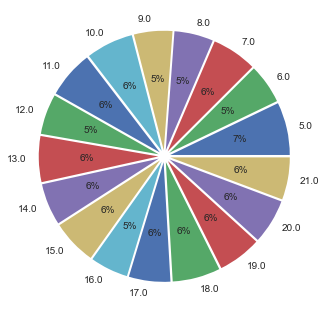

In [58]:
Item_Weight=train.groupby("Item_Weight")["Item_Outlet_Sales"].median()
plt.pie(x=Item_Weight, autopct="%1.f%%", explode=[0.05]*len(Item_Weight), labels=Item_Weight.keys())

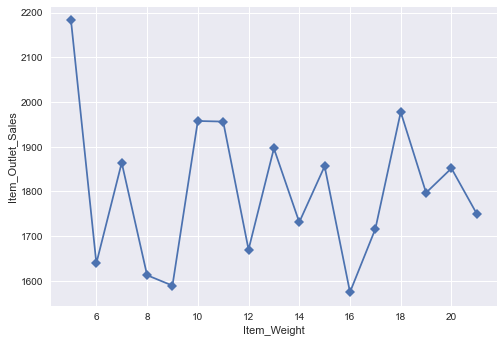

In [59]:
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Weight")["Item_Outlet_Sales"].median(),marker="D")

#### Thus, there is no specific relation between the two.
### 'Item_Fat_Content'

In [60]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].median()

Item_Fat_Content
Low Fat    1765.0358
Regular    1841.9357
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

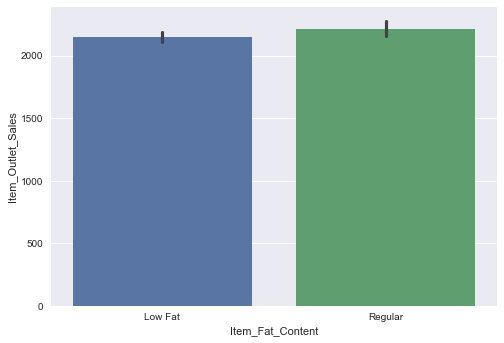

In [61]:
sb.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b53ef1b1f0>,
 [Text(0.038505236607514835, 1.1493551873784709, 'Low Fat'),
  Text(-0.038505344217913406, -1.1493551837733451, 'Regular')],
 [Text(0.02176382938685621, 0.6496355406921791, '48.9%'),
  Text(-0.021763890210124964, -0.6496355386544994, '51.1%')])

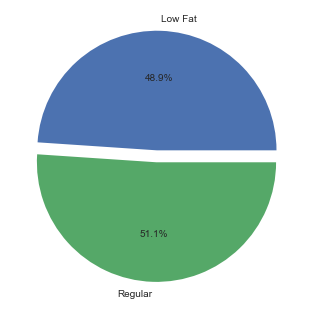

In [62]:
Item_Fat_Content=train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].median()
plt.pie(x=Item_Fat_Content, autopct="%.1f%%", explode=[0.05]*len(Item_Fat_Content), labels=Item_Fat_Content.keys())

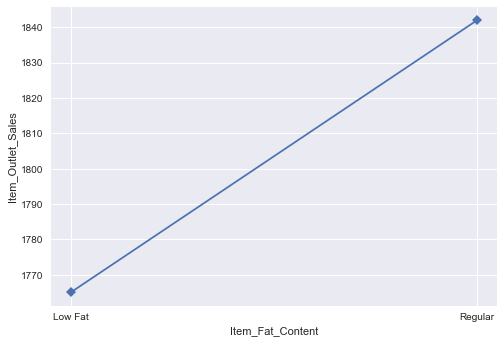

In [63]:
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].median(),marker="D")

#### Thus, Low Fat and Regular are almost equally distributed.
### 'Item_Visibility'

In [64]:
train.groupby("Item_Visibility")["Item_Outlet_Sales"].median()

Item_Visibility
0.000    1774.0241
0.004    2999.0961
0.005    3179.8608
0.006    2404.5367
0.007    1344.9160
           ...    
0.196     352.8740
0.197     249.0092
0.198     272.9780
0.199     582.5750
0.200     379.5060
Name: Item_Outlet_Sales, Length: 198, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

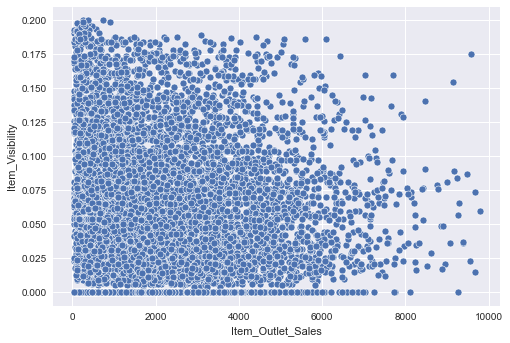

In [65]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)

#### There is no specific relation between the two
### 'Item_Type'

In [66]:
train.groupby("Item_Type")["Item_Outlet_Sales"].median()

Item_Type
Baking Goods             1577.9460
Breads                   1860.2452
Breakfast                1554.6430
Canned                   1857.5820
Dairy                    1650.8511
Frozen Foods             1687.1372
Fruits and Vegetables    1817.6340
Hard Drinks              1816.6353
Health and Hygiene       1669.4935
Household                1974.4299
Meat                     1829.6184
Others                   1713.7692
Seafood                  2055.3246
Snack Foods              1941.4728
Soft Drinks              1518.0240
Starchy Foods            1968.1048
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

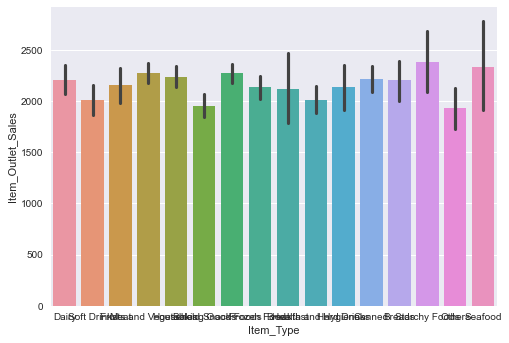

In [67]:
sb.barplot(x="Item_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b53f0f4370>,
 [Text(1.132638690775149, 0.1990718366800204, 'Baking Goods'),
  Text(0.9785514038676716, 0.6041002814008691, 'Breads'),
  Text(0.6878829794926453, 0.9215839660738034, 'Breakfast'),
  Text(0.30116716353941386, 1.109864108621242, 'Canned'),
  Text(-0.13979368499419573, 1.141471736678462, 'Dairy'),
  Text(-0.5411218802177259, 1.0147349953311127, 'Frozen Foods'),
  Text(-0.8836585036537351, 0.7359671520662062, 'Fruits and Vegetables'),
  Text(-1.100739177959245, 0.3329763686894395, 'Hard Drinks'),
  Text(-1.1452808079609271, -0.1040762745123322, 'Health and Hygiene'),
  Text(-1.0133811852179713, -0.5436529899174837, 'Household'),
  Text(-0.7041456828393018, -0.90921881708353, 'Meat'),
  Text(-0.3048317843394567, -1.1088631941120706, 'Others'),
  Text(0.16878070395122635, -1.137546954623733, 'Seafood'),
  Text(0.6378833861138391, -0.9568723978253019, 'Snack Foods'),
  Text(0.9482410728912957, -0.6506449628499131, 'Soft Drinks'),
  Text(1.12302

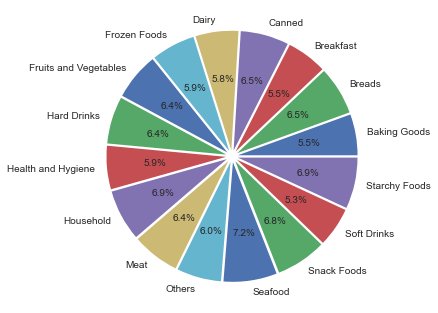

In [68]:
Item_Type=train.groupby("Item_Type")["Item_Outlet_Sales"].median()
plt.pie(x=Item_Type, autopct="%.1f%%", explode=[0.05]*len(Item_Type), labels=Item_Type.keys())

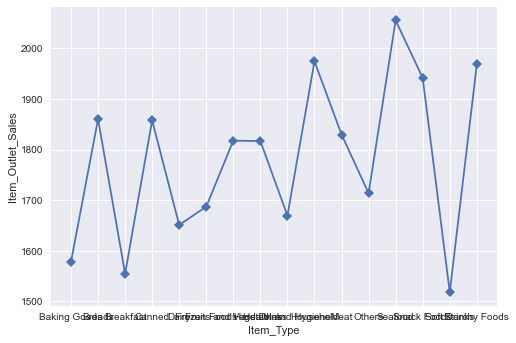

In [69]:
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Type")["Item_Outlet_Sales"].median(),marker="D")

#### So, for different food type there are different outlet sales.
### 'Item_MRP'

In [70]:
train.groupby("Item_MRP")["Item_Outlet_Sales"].median()

Item_MRP
31.0      682.4450
32.0      403.1419
33.0      531.3084
34.0      494.0236
35.0      441.4254
           ...    
263.0    3822.6907
264.0    3934.8780
265.0    4745.8224
266.0    3047.3666
267.0    2649.8840
Name: Item_Outlet_Sales, Length: 229, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

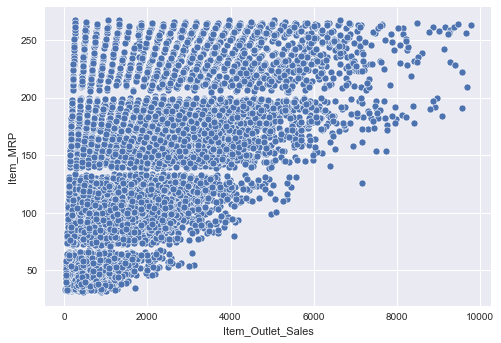

In [71]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_MRP",data=train)

#### There is almost a linear relationship between the two.
### 'Outlet_Identifier'

In [72]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].median()

Outlet_Identifier
OUT010     250.3408
OUT013    2045.3376
OUT017    2005.0567
OUT018    1655.1788
OUT019     265.3213
OUT027    3307.6944
OUT035    2109.2544
OUT045    1834.9448
OUT046    1945.8005
OUT049    1966.1074
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

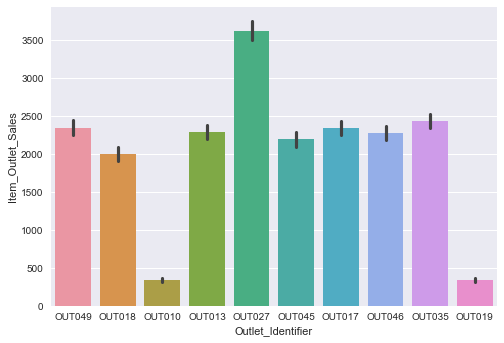

In [73]:
sb.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b53f28ec40>,
 [Text(1.1488234630470158, 0.05200625686070877, 'OUT010'),
  Text(1.0304181332110651, 0.510625568053367, 'OUT013'),
  Text(0.4252555452450849, 1.0684838422916398, 'OUT017'),
  Text(-0.32073543095059254, 1.1043680470445247, 'OUT018'),
  Text(-0.6772340494063174, 0.9294374870451061, 'OUT019'),
  Text(-1.1001778021679165, 0.3348265276482327, 'OUT027'),
  Text(-0.8917110590213487, -0.7261896358521133, 'OUT035'),
  Text(-0.19977876864777624, -1.1325142134196722, 'OUT045'),
  Text(0.5599976377888375, -1.0044414595539763, 'OUT046'),
  Text(1.0781779441433879, -0.40004039891333165, 'OUT049')],
 [Text(0.649335000852661, 0.02939484083431365, '1.4%'),
  Text(0.5824102492062542, 0.28861445150842485, '11.8%'),
  Text(0.24036182992113492, 0.6039256499909268, '11.5%'),
  Text(-0.1812852435807697, 0.6242080265903835, '9.5%'),
  Text(-0.38278446270791844, 0.5253342318081033, '1.5%'),
  Text(-0.6218396273123006, 0.18924977649682714, '19.0%'),
  Text(-0.5040

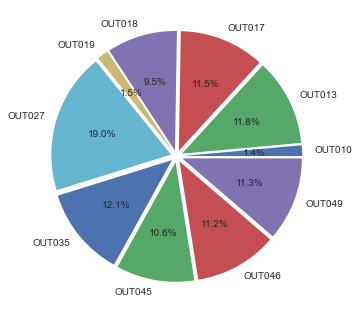

In [74]:
Outlet_Identifier=train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].median()
plt.pie(x=Outlet_Identifier, autopct="%.1f%%", explode=[0.05]*len(Outlet_Identifier), labels=Outlet_Identifier.keys())

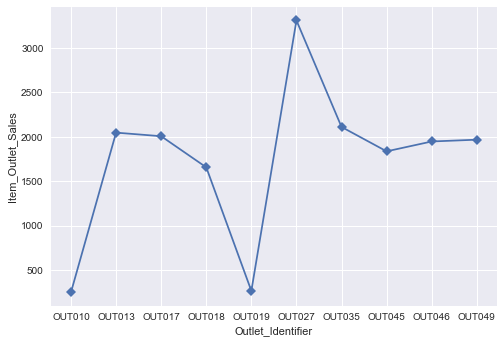

In [75]:
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].median(),marker="D")

#### So, for different outlets there are different outlet sales.
### 'Outlet_Establishment_Year'

In [76]:
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].median()

Outlet_Establishment_Year
1985    1810.9760
1987    2045.3376
1997    1945.8005
1998     250.3408
1999    1966.1074
2002    1834.9448
2004    2109.2544
2007    2005.0567
2009    1655.1788
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

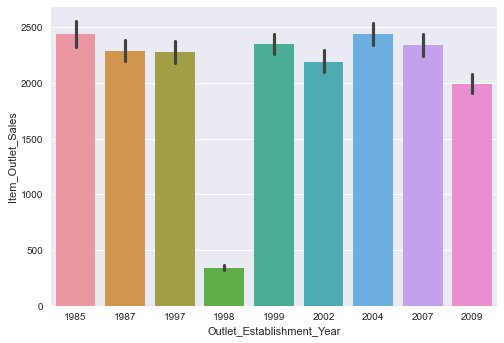

In [77]:
sb.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b5403b4ca0>,
 [Text(1.07458471410981, 0.409594546108146, '1985'),
  Text(0.48062835078774263, 1.0447470451832133, '1987'),
  Text(-0.41735279338386905, 1.0715953741290047, '1997'),
  Text(-0.8353145963002825, 0.7904109849993839, '1998'),
  Text(-1.0944501166395084, 0.35309905435694244, '1999'),
  Text(-1.0343806072923658, -0.5025502554545929, '2002'),
  Text(-0.3676469544284004, -1.0896493550218447, '2004'),
  Text(0.5532880608530539, -1.0081529257595137, '2007'),
  Text(1.086887472058597, -0.37573344685038673, '2009')],
 [Text(0.6073739688446751, 0.23150996084373468, '11.6%'),
  Text(0.27165950261915883, 0.5905091994513814, '13.1%'),
  Text(-0.2358950571300129, 0.6056843418990026, '12.5%'),
  Text(-0.47213433703929003, 0.4467540349996518, '1.6%'),
  Text(-0.6186022398397221, 0.19957772637566312, '12.6%'),
  Text(-0.5846499084695981, -0.2840501443873785, '11.7%'),
  Text(-0.20780045250300888, -0.6158887658819121, '13.5%'),
  Text(0.31272803439520436, -

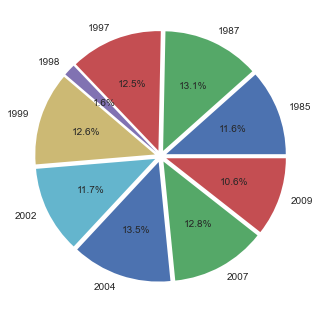

In [78]:
Outlet_Establishment_Year=train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].median()
plt.pie(x=Outlet_Establishment_Year, autopct="%.1f%%", explode=[0.05]*len(Outlet_Establishment_Year), labels=Outlet_Establishment_Year.keys())

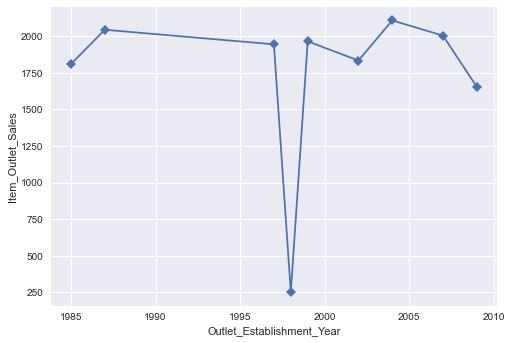

In [79]:
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].median(),marker="D")

#### All the outlets have a good average outlet sales except the ones established in 1998.

### 'Outlet_Size'

In [80]:
train.groupby("Outlet_Size")["Item_Outlet_Sales"].median()

Outlet_Size
High      2045.3376
Medium    1845.5976
Small     1544.6560
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

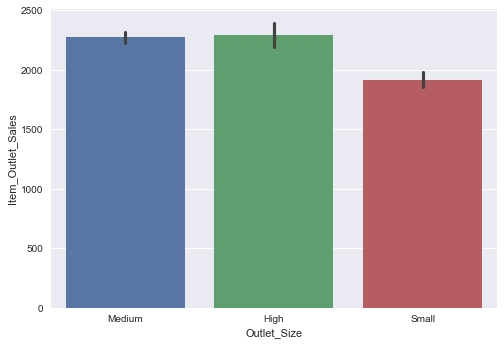

In [81]:
sb.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b5404dbbb0>,
 [Text(0.4357894310779184, 1.0642309766966869, 'High'),
  Text(-1.1021849313766596, -0.32815907277756073, 'Medium'),
  Text(0.7213544301923747, -0.8956270351222292, 'Small')],
 [Text(0.24631576539186692, 0.6015218563937795, '37.6%'),
  Text(-0.6229740916476771, -0.18548121504818646, '34.0%'),
  Text(0.40772206923916826, -0.5062239763734339, '28.4%')])

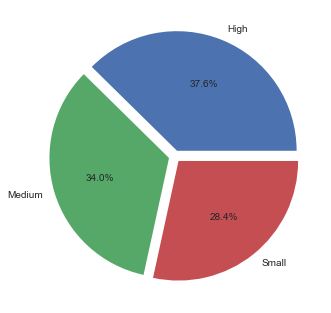

In [82]:
Outlet_Size=train.groupby("Outlet_Size")["Item_Outlet_Sales"].median()
plt.pie(x=Outlet_Size, autopct="%.1f%%", explode=[0.05]*len(Outlet_Size), labels=Outlet_Size.keys())

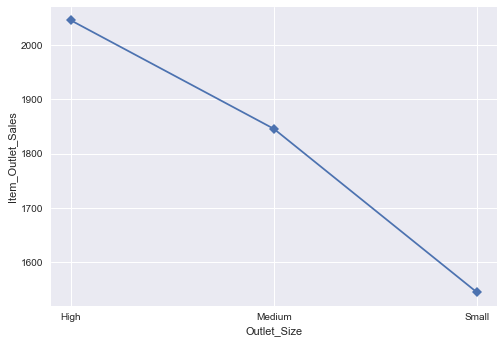

In [83]:
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Size")["Item_Outlet_Sales"].median(),marker="D")

#### As we can see, the small outlets have lower and the high outlets have higher outlet sales.
### 'Outlet_Location_Type'

In [84]:
train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].median()

Outlet_Location_Type
Tier 1    1487.3972
Tier 2    2004.0580
Tier 3    1797.6600
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

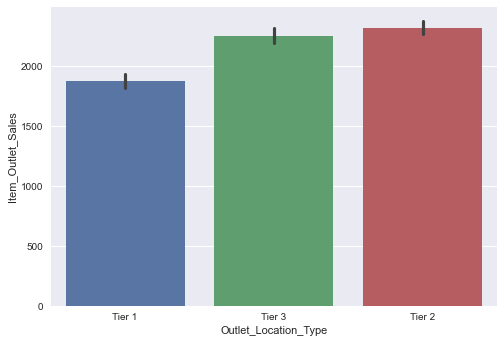

In [85]:
sb.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b5405d5040>,
 [Text(0.729640164768842, 0.8888898862941896, 'Tier 1'),
  Text(-1.13052706073899, 0.2107333977727796, 'Tier 2'),
  Text(0.5543992738161707, -1.0075422796052298, 'Tier 3')],
 [Text(0.4124053105215193, 0.5024160226880202, '28.1%'),
  Text(-0.6389935560698637, 0.11911018134983192, '37.9%'),
  Text(0.3133561112874008, -0.5694804189073036, '34.0%')])

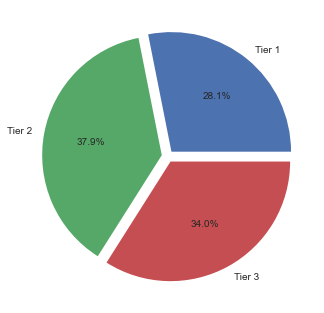

In [86]:
Outlet_Location_Type=train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].median()
plt.pie(x=Outlet_Location_Type, autopct="%.1f%%", explode=[0.05]*len(Outlet_Location_Type), labels=Outlet_Location_Type.keys())

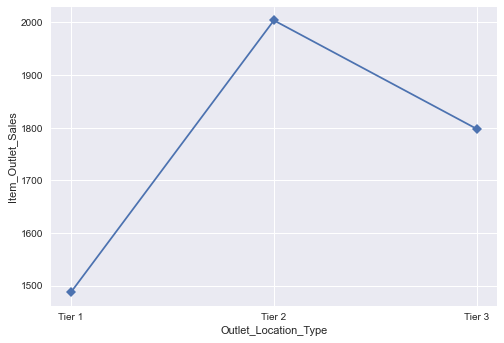

In [87]:
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].median(),marker="D")

#### Tier 2 and 3 have almost equal average outlet sales but Tier 1 has a bit lesser.

### 'Outlet_Type'

In [88]:
train.groupby("Outlet_Type")["Item_Outlet_Sales"].median()

Outlet_Type
Grocery Store         256.9988
Supermarket Type1    1989.4104
Supermarket Type2    1655.1788
Supermarket Type3    3307.6944
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

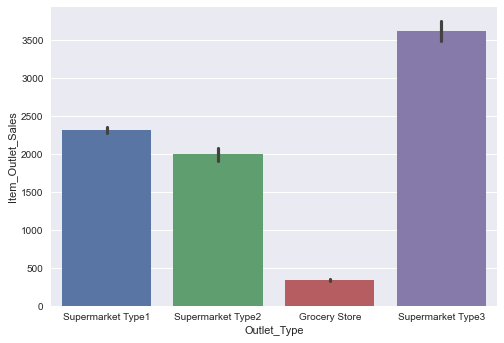

In [89]:
sb.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x2b5406cf610>,
 [Text(1.1427957006013814, 0.12852231980087217, 'Grocery Store'),
  Text(0.530928692140728, 1.0201052513646502, 'Supermarket Type1'),
  Text(-1.029192737432457, 0.5130909365953428, 'Supermarket Type2'),
  Text(0.1483959893184028, -1.1403852990784356, 'Supermarket Type3')],
 [Text(0.6459280046877374, 0.07264305032223209, '3.6%'),
  Text(0.3000901303404115, 0.5765812290321936, '27.6%'),
  Text(-0.5817176342009538, 0.2900079206843242, '23.0%'),
  Text(0.0838759939625755, -0.6445656038269417, '45.9%')])

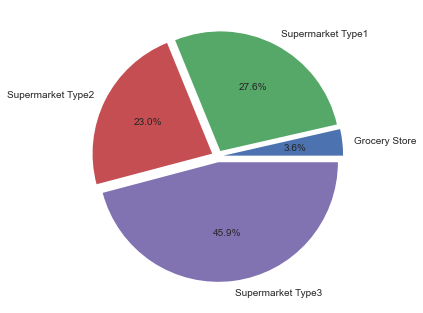

In [90]:
Outlet_Type=train.groupby("Outlet_Type")["Item_Outlet_Sales"].median()
plt.pie(x=Outlet_Type, autopct="%.1f%%", explode=[0.05]*len(Outlet_Type), labels=Outlet_Type.keys())

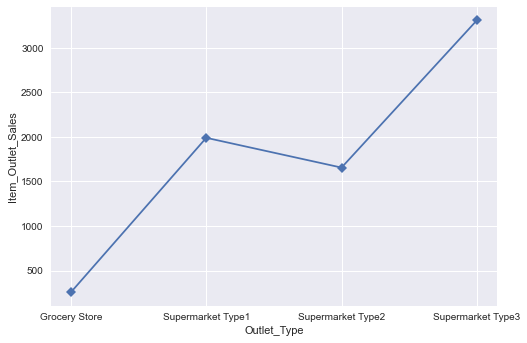

In [91]:
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Type")["Item_Outlet_Sales"].median(),marker="D")

#### Supermarket 3 type have a lot higher while Grocery Stores have very less average outlet sales.

## Encoding the Categorical variables

In [92]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.896867,0.063097,140.989088,1997.831867,2172.587580
std,4.243392,0.046002,62.275770,8.371760,1684.387192
min,5.000000,0.000000,31.000000,1985.000000,33.290000
25%,9.000000,0.027000,94.000000,1987.000000,834.247400
50%,13.000000,0.054000,143.000000,1999.000000,1794.331000
75%,16.000000,0.091000,186.000000,2004.000000,3095.970000
max,21.000000,0.200000,267.000000,2009.000000,9779.936200


In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [94]:
train["Item_Fat_Content"]=le.fit_transform(train["Item_Fat_Content"])
train["Item_Type"]=le.fit_transform(train["Item_Type"])
train["Outlet_Identifier"]=le.fit_transform(train["Outlet_Identifier"])
train["Outlet_Establishment_Year"]=le.fit_transform(train["Outlet_Establishment_Year"])
train["Outlet_Size"]=le.fit_transform(train["Outlet_Size"])
train["Outlet_Location_Type"]=le.fit_transform(train["Outlet_Location_Type"])
train["Outlet_Type"]=le.fit_transform(train["Outlet_Type"])
train["Item_Identifier"]=le.fit_transform(train["Item_Identifier"])

In [95]:
test["Item_Fat_Content"]=le.fit_transform(test["Item_Fat_Content"])
test["Item_Type"]=le.fit_transform(test["Item_Type"])
test["Outlet_Identifier"]=le.fit_transform(test["Outlet_Identifier"])
test["Outlet_Establishment_Year"]=le.fit_transform(test["Outlet_Establishment_Year"])
test["Outlet_Size"]=le.fit_transform(test["Outlet_Size"])
test["Outlet_Location_Type"]=le.fit_transform(test["Outlet_Location_Type"])
test["Outlet_Type"]=le.fit_transform(test["Outlet_Type"])
test["Item_Identifier"]=le.fit_transform(test["Item_Identifier"])

## Heatmap

<AxesSubplot:>

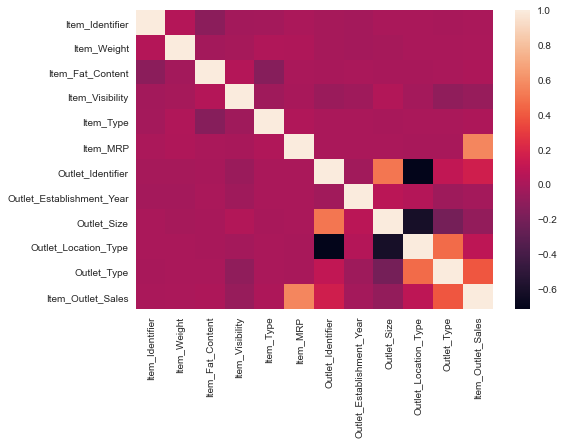

In [96]:
sb.heatmap(train.corr())

## High Correlation filter

In [97]:
corr_test=test.corr().abs()
corr_test=corr_test.where(np.triu(np.ones(corr_test.shape),k=1).astype(bool))
corr_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,NaN,0.050821,0.105690,0.063801,0.003236,0.007645,0.010162,0.013450,0.004379,0.011657,0.009553
Item_Weight,NaN,NaN,0.043334,0.020129,0.031600,0.044870,0.020652,0.051690,0.006215,0.017453,0.021233
Item_Fat_Content,NaN,NaN,NaN,0.029295,0.160149,0.019197,0.003881,0.003311,0.000652,0.005827,0.003864
Item_Visibility,NaN,NaN,NaN,NaN,0.035350,0.005034,0.055052,0.052309,0.022125,0.010545,0.055445
Item_Type,NaN,NaN,NaN,NaN,NaN,0.060945,0.000333,0.001545,0.003729,0.000584,0.006179
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,0.006314,0.005519,0.011659,0.001711,0.003322
Outlet_Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030916,0.504545,0.716113,0.099937
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070810,0.041714,0.040576
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614284,0.201538
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467299


In [98]:
drop_test=[column for column in corr_test.columns if any(corr_test[column]>0.5)]
test=test.drop(test[drop_test],1)

In [99]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,1103,21.0,0,0.008,13,108.0,9,4,1
1,1067,8.0,1,0.038,4,87.0,2,7,1
2,1406,15.0,0,0.100,11,242.0,0,3,0
3,809,7.0,0,0.015,13,155.0,2,7,1
4,1184,12.0,1,0.119,4,234.0,5,0,3


#### Thus, 'Outlet_Size' and 'Outlet_Location_type' are the two dependent variables which are dropped by the high correlation filter. Therefore, we have to drop them in the train data too.

In [100]:
train=train.drop("Outlet_Size",axis=1)
train=train.drop(["Outlet_Location_Type"],axis=1)

## Converting train data into x and y

In [101]:
x=train.drop(["Item_Outlet_Sales"],axis=1)
y=train["Item_Outlet_Sales"]
y=np.log(y)

## Scaling the data

In [102]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()

scaled_x=mms.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

scaled_test=mms.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)

In [103]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,-1.388514,-0.918392,-0.738147,-1.023853,-0.766479,1.750557,1.507813,0.076668,-0.252658
1,-1.717991,-1.625415,1.354743,-0.958635,1.608963,-1.493270,-0.607071,1.541783,1.002972
2,-0.262057,1.202677,-0.738147,-1.002114,0.658786,0.016234,1.507813,0.076668,-0.252658
3,0.759769,1.438352,1.354743,-1.371685,-0.291391,0.658576,-1.664513,-0.289611,-1.508289
4,1.151580,-0.918392,-0.738147,-1.371685,0.421242,-1.396919,-1.312032,-1.022168,-0.252658


In [104]:
y.head()

0    8.225540
1    6.094524
2    7.648392
3    6.596300
4    6.902446
Name: Item_Outlet_Sales, dtype: float64

In [105]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,0.739896,1.971892,-0.740811,-1.214115,1.366916,-0.534259,1.507689,0.077048,-0.252769
1,0.659085,-1.076486,1.349873,-0.540695,-0.766450,-0.874037,-0.959749,1.175901,-0.252769
2,1.420050,0.564949,-0.740811,0.851038,0.892835,1.633849,-1.664731,-0.289236,-1.507994
3,0.079943,-1.310976,-0.740811,-1.056984,1.366916,0.226197,-0.959749,1.175901,-0.252769
4,0.921719,-0.138523,1.349873,1.277537,-0.766450,1.504410,0.097725,-1.388089,2.257683


## Evaluation Metric

In [106]:
from sklearn.metrics import mean_squared_log_error as mse
def error(true,pred):
    return np.sqrt(mse(true,pred))

## Creating train and test data for x and y

In [107]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=20)

In [108]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((6392, 9), (6392,), (2131, 9), (2131,))

## KFold cross validation

In [109]:
from sklearn.model_selection import KFold

def kfoldpred(model):
    kfold=KFold(5,random_state=20,shuffle=True)
    scores=[]
    for i,j in kfold.split(train_x,train_y):
        x_train,x_test=train_x.iloc[i],train_x.iloc[j]
        y_train,y_test=train_y.iloc[i],train_y.iloc[j]
        model.fit(x_train,y_train)
        scores.append(model.score(x_train,y_train))
    return np.mean(scores)

## Model Building

### LinearRegression

In [110]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_x,train_y)

tlr=lr.predict(train_x)
tlr=pd.DataFrame(tlr,columns=["pred"])

train_lr=kfoldpred(lr)

plr=lr.predict(test_x)
plr=pd.DataFrame(plr,columns=["pred"])

lr_train=lr.score(train_x,train_y)
print("Training score=",train_lr,"%")
print("Training error=",error(train_y,tlr))

Training score= 0.5479353578975549 %
Training error= 0.08875833146497304


In [111]:
score_lr=lr.score(test_x,test_y)
print("Test score=",100*score_lr,"%")
print("Test error=",error(test_y,plr))

Test score= 55.01388474295782 %
Test error= 0.08811465571435861


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

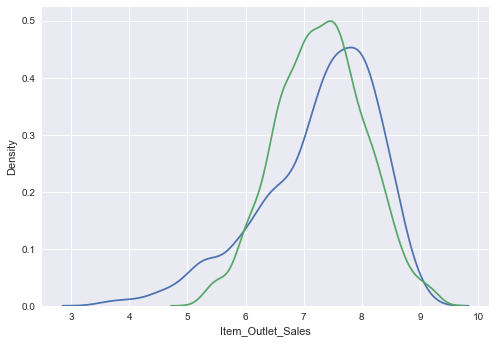

In [112]:
sb.distplot(test_y,hist=False)
sb.distplot(plr,hist=False)

In [113]:
pred_lr=lr.predict(test)
pred_lr=pd.DataFrame(pred_lr,columns=["pred"])

### KNNRegressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()

kn.fit(train_x,train_y)

tkn=kn.predict(train_x)
tkn=pd.DataFrame(tkn,columns=["pred"])

train_kn=kfoldpred(kn)

pkn=kn.predict(test_x)
pkn=pd.DataFrame(pkn,columns=["pred"])

print("Training score=",train_kn,"%")
print("Training error=",error(train_y,tkn))

Training score= 0.7705303607189276 %
Training error= 0.06252296976683412


In [115]:
score_kn=kn.score(test_x,test_y)
print("Test score=",100*score_kn,"%")
print("Test error=",error(test_y,pkn))

Test score= 66.6385229656306 %
Test error= 0.07469817418069903


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

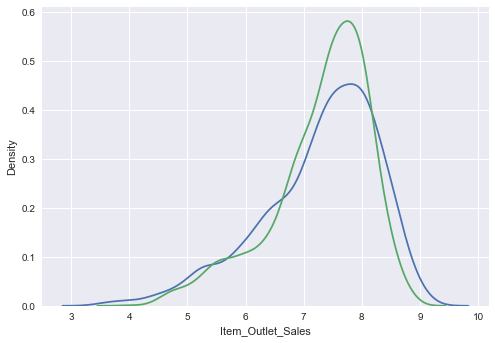

In [116]:
sb.distplot(test_y,hist=False)
sb.distplot(pkn,hist=False)

In [117]:
pred_kn=kn.predict(test)
pred_kn=pd.DataFrame(pred_kn,columns=["pred"])

### DecisionTreeRegressor

In [118]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

dt.fit(train_x,train_y)

tdt=dt.predict(train_x)
tdt=pd.DataFrame(tdt,columns=["pred"])

train_dt=kfoldpred(dt)

pdt=dt.predict(test_x)
pdt=pd.DataFrame(pdt,columns=["pred"])

print("Training score=",100*train_dt,"%")
print("Training error=",error(train_y,tdt))

Training score= 100.0 %
Training error= 0.0


In [119]:
score_dt=dt.score(test_x,test_y)
print("Test score=",100*score_dt,"%")
print("Test error=",error(test_y,pdt))

Test score= 43.57558689546587 %
Test error= 0.09734347964064778


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

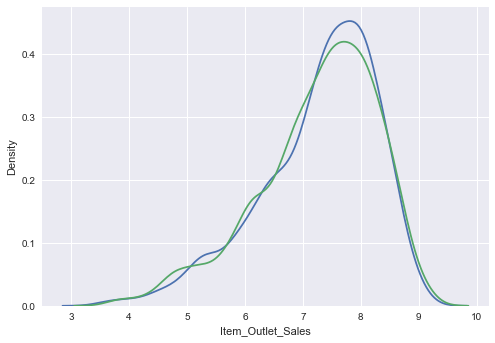

In [120]:
sb.distplot(test_y,hist=False)
sb.distplot(pdt,hist=False)

In [121]:
pred_dt=dt.predict(test)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

### RandomForestRegressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(train_x,train_y)

trf=rf.predict(train_x)
trf=pd.DataFrame(trf,columns=["pred"])

train_rf=kfoldpred(rf)

prf=rf.predict(test_x)
prf=pd.DataFrame(prf,columns=["pred"])

print("Training score=",100*train_rf,"%")
print("Training error=",error(train_y,trf))

Training score= 95.7041817889129 %
Training error= 0.02750687734258226


In [123]:
score_rf=rf.score(test_x,test_y)
print("Test score=",100*score_rf,"%")
print("Test error=",error(test_y,prf))

Test score= 70.92920016336498 %
Test error= 0.06958007373245548


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

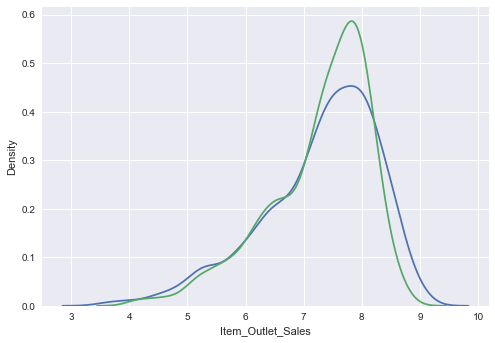

In [124]:
sb.distplot(test_y,hist=False)
sb.distplot(prf,hist=False)

In [125]:
pred_rf=rf.predict(test)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

### XGBRegressor

In [126]:
from xgboost import XGBRegressor
xr=XGBRegressor()

xr.fit(train_x,train_y)

txr=xr.predict(train_x)
txr=pd.DataFrame(txr,columns=["pred"])

train_xr=kfoldpred(xr)

pxr=xr.predict(test_x)
pxr=pd.DataFrame(pxr,columns=["pred"])
pxr["pred"]=pxr["pred"].apply(lambda x:0 if x<0 else x)

train_xr=xr.score(train_x,train_y)
print("Training score=",100*train_xr,"%")
print("Training error=",error(train_y,txr))

Training score= 86.63973073538098 %
Training error= 0.04172171010336731


In [127]:
score_xr=xr.score(test_x,test_y)
print("Test score=",100*score_xr,"%")
print("Test error=",error(test_y,pxr))

Test score= 70.09545952936291 %
Test error= 0.07077822069440771


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

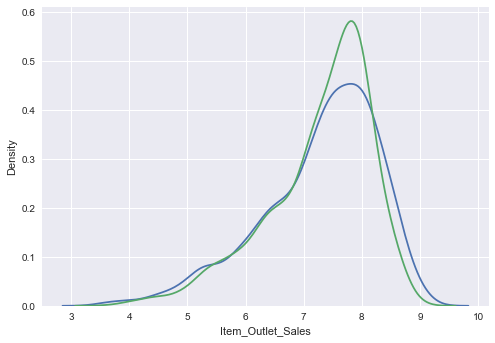

In [128]:
sb.distplot(test_y,hist=False)
sb.distplot(pxr,hist=False)

In [129]:
pred_xr=xr.predict(test)
pred_xr=pd.DataFrame(pred_xr,columns=["pred"])

## Ensembling the models

In [130]:
from statistics import mean
train_ens=[]
test_ens=[]

for i in range(0,len(train_x)):
    train_ens.append(mean([tdt["pred"][i],tdt["pred"][i],trf["pred"][i]]))

for i in range(0,len(test_x)):
    test_ens.append(mean([prf["pred"][i],pxr["pred"][i]]))

score_train=r2_score(train_y,train_ens)
score_test=r2_score(test_y,test_ens)

In [131]:
print("Ensembled train score=",100*score_train,"%")
print("Ensembled train error=",error(train_y,train_ens))

Ensembled train score= 99.51820466641117 %
Ensembled train error= 0.009254608343477721


In [132]:
print("Ensembled test score=",100*score_test,"%")
print("Ensembled test error=",error(test_y,test_ens))

Ensembled test score= 71.54097292024413 %
Ensembled test error= 0.06892679811398585


In [133]:
final_prediction=[]
for i in range(0,len(test)):
    final_prediction.append(mean([pred_rf["pred"][i],pred_rf["pred"][i],pred_dt["pred"][i]]))

final_prediction=pd.DataFrame(final_prediction,columns=["pred"])
final_prediction["pred"]=final_prediction["pred"].apply(lambda x:100 if x<0 else x)
final_prediction["pred"]=final_prediction["pred"].apply(lambda x:np.exp(x))

final_prediction.head()

,pred
0,1557.759709
1,1725.987423
2,557.001206
3,1931.581330
4,6532.344992


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

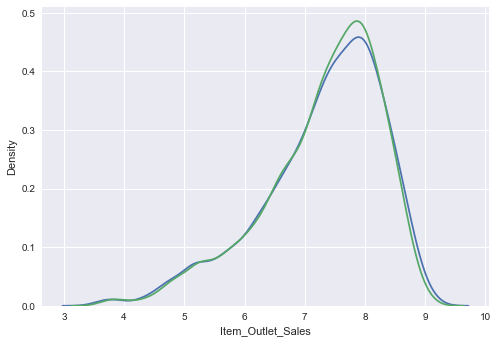

In [134]:
sb.distplot(train_y,hist=False)
sb.distplot(train_ens,hist=False)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

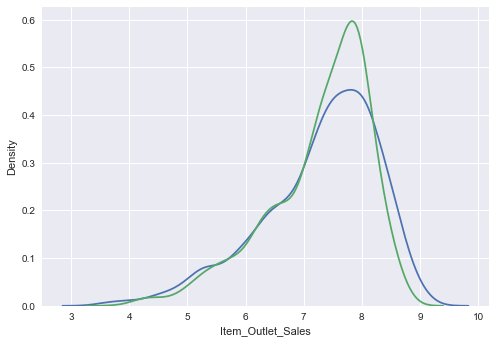

In [135]:
sb.distplot(test_y,hist=False)
sb.distplot(test_ens,hist=False)

#### Thus, final_prediction depicts the final Retail Sales prediction